In [39]:
%pylab inline
import pandas as pd
import uproot, awkward as ak
import sys
from yahist import Hist1D
from yahist.utils import plot_stack
sys.path.append("/home/users/bsathian/HHggTauTau/HggAnalysisDev/Preselection/plots_and_tables/")
from plotter import Plotter
import json
import mplhep as hep
plt.style.use(hep.style.CMS)

Populating the interactive namespace from numpy and matplotlib


/home/users/bsathian/HHggTauTau/pythonenv/lib64/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
process_ids = {}
process_ids["Data"] = 0

process_ids["HH_ggTauTau"] = -1
#process_ids["HH_ggZZ"] = -2
#process_ids["HH_ggZZ_4l"] = -5
#process_ids["HH_ggZZ_2l2q"] = -6
process_ids["HH_ggWW_dileptonic"] = -3
process_ids["HH_ggWW_semileptonic"] = -4

process_ids["DiPhoton"] = 3
process_ids["GJets"] = 8
process_ids["TTGG"] = 7
process_ids["TTGamma"] = 6
process_ids["TTbar"] = 5
process_ids["VH"] = 9
process_ids["WGamma"] = 4
process_ids["ZGamma"] = 2
process_ids["ttH"] = 10
process_ids["ggH"] = 11
process_ids["VBFH"] = 12

In [41]:
is_resonant = {}

is_resonant["Data"] = False
is_resonant["DiPhoton"] = False
is_resonant["GJets"] = False
is_resonant["HH_ggTauTau"] = True
is_resonant["HH_ggZZ"] = True
is_resonant["HH_ggWW_dileptonic"] = True
is_resonant["HH_ggWW_semileptonic"] = True
is_resonant["HH_ggZZ_4l"] = True
is_resonant["HH_ggZZ_2l2q"] = True
is_resonant["TTGG"] = False
is_resonant["TTGamma"] = False
is_resonant["TTbar"] = False
is_resonant["VH"] = True
is_resonant["WGamma"] = False
is_resonant["ZGamma"] = False
is_resonant["ttH"] = True
is_resonant["ggH"] = True
is_resonant["VBFH"] = True

In [42]:
colors = {}
colors["Data"] = "k"
colors["DiPhoton"] = "C0"
colors["GJets"] = "C1"
colors["HH_ggTauTau"] = "k"
colors["HH_ggZZ"] = "b"
colors["HH_ggWW"] = "g"
colors["TTbar"] = "C3"
colors["VH"] = "C4"
colors["WGamma"] = "C5"
colors["ZGamma"] = "C6"
colors["ttH"] = "C7"
colors["ggH"] = "C8"
colors["VBFH"] = "C2"

In [43]:
t = uproot.open("../output/run2_all_with_isoTrack_isolation_no_HHggZZ.root")["t"]
master_df = t.arrays(library="pd")

In [44]:
t = uproot.open("GJets_background.root")["t"]
gjets_df = t.arrays(library="pd")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


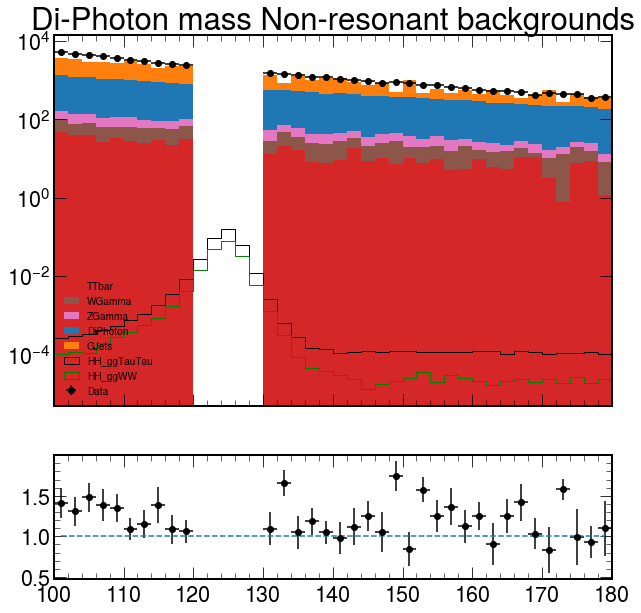

In [45]:
mgg_binning = "40,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process] and "HH_gg" not in process:
        continue
    toFill = master_df.loc[master_df["process_id"] == process_id, "mgg"] # select by process, then select the quantity
    weight = master_df.loc[master_df["process_id"] == process_id, "weight"]
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(ax=ax1, show_errors=True, color="k")


mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]
mgg_hists["HH_ggTauTau"].plot(ax=ax1, color=colors["HH_ggTauTau"], histtype="step")
mgg_hists["HH_ggWW"].plot(ax=ax1, histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
#plt.title("Di-Photon Mass Non-resonant backgrounds Category 3")
ax1.set_yscale("log")
ax1.legend(fontsize=10)

total_background = hist_stack[0].copy()
for hist in hist_stack[1:]:
        total_background = total_background + hist
ratio_hist = mgg_hists["Data"].copy()
ratio_hist = (ratio_hist / total_background)
ratio_hist.plot(ax=ax2, show_errors=True, legend=False)
plt.sca(ax2)
plt.plot(ratio_hist.bin_centers, np.ones_like(ratio_hist.bin_centers), "--")
ax1.set_title("Di-Photon mass Non-resonant backgrounds")
plt.savefig("mc_only.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


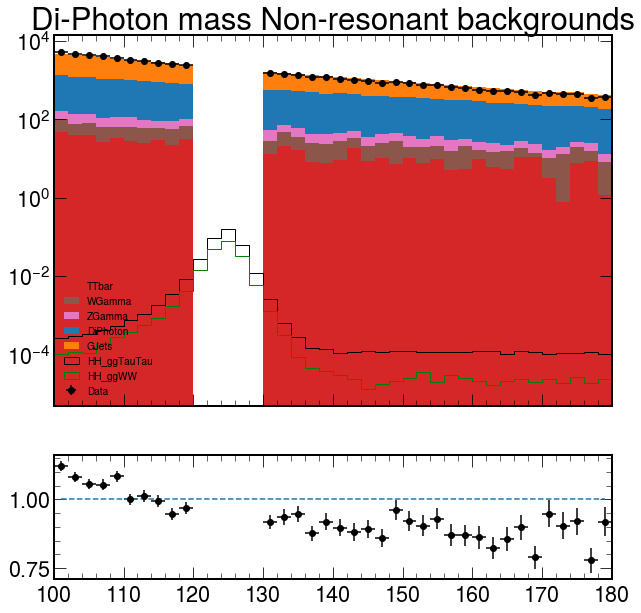

In [46]:
# Fancy stuff

mgg_binning = "40,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process] and "HH_gg" not in process:
        continue
    if process == "GJets":
        toFill = gjets_df["mgg"]
        weight = gjets_df["weight"]
    else:
        toFill = master_df.loc[master_df["process_id"] == process_id, "mgg"] # select by process, then select the quantity
        weight = master_df.loc[master_df["process_id"] == process_id, "weight"]
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(ax=ax1, show_errors=True, color="k")


mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]
mgg_hists["HH_ggTauTau"].plot(ax=ax1, color=colors["HH_ggTauTau"], histtype="step")
mgg_hists["HH_ggWW"].plot(ax=ax1, histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
#plt.title("Di-Photon Mass Non-resonant backgrounds Category 3")
ax1.set_yscale("log")
ax1.legend(fontsize=10)

total_background = hist_stack[0].copy()
for hist in hist_stack[1:]:
        total_background = total_background + hist
ratio_hist = mgg_hists["Data"].copy()
ratio_hist = (ratio_hist / total_background)

ratio_hist.plot(ax=ax2, show_errors=True, legend=False)
plt.sca(ax2)
plt.plot(ratio_hist.bin_centers, np.ones_like(ratio_hist.bin_centers), "--")

ax1.set_title("Di-Photon mass Non-resonant backgrounds")
plt.savefig("data_driven.pdf")

In [47]:
temp = Hist1D(gjets_df["min_gamma_idmva_sim"], weights=gjets_df["weight"], bins=50)

<AxesSubplot:>

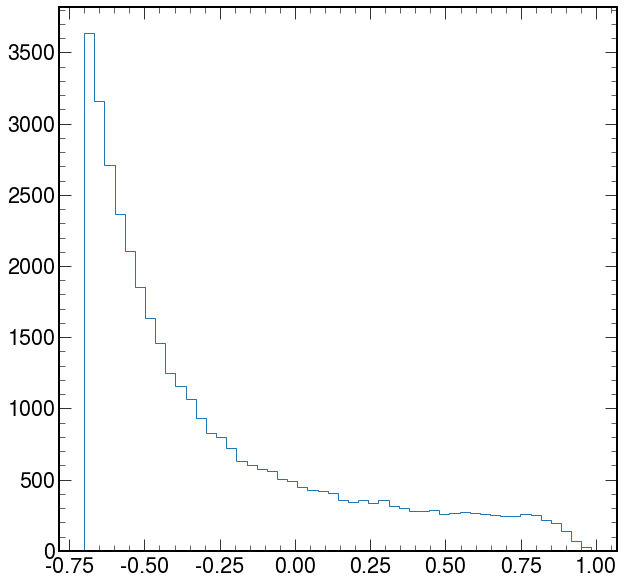

In [48]:
temp.plot()

In [49]:
Hist1D(gjets_df["max_gamma_idmva"],weights=gjets_df["weight"], bins=50)

[63.08 ± 1.11   158.97 ± 2.62   222.68 ± 3.83   268.45 ± 4.84
 293.72 ± 5.58   308.12 ± 6.17   316.21 ± 6.64   334.18 ± 7.17
 334.50 ± 7.46   341.24 ± 7.79   340.94 ± 8.02   342.25 ± 8.25
 310.58 ± 8.03   294.35 ± 7.97   293.69 ± 8.10   318.57 ± 8.57
 289.86 ± 8.29   301.22 ± 8.56   301.17 ± 8.67   290.35 ± 8.61
 299.96 ± 8.85   306.16 ± 9.03   304.56 ± 9.09   322.18 ± 9.43
 314.34 ± 9.39   320.34 ± 9.56   317.28 ± 9.59   350.87 ± 10.16
 353.84 ± 10.28   385.47 ± 10.81   389.18 ± 10.94   401.83 ± 11.19
 425.66 ± 11.59   459.58 ± 12.12   504.39 ± 12.77   515.08 ± 12.98
 565.97 ± 13.69   611.43 ± 14.32   679.08 ± 15.18   737.63 ± 15.91
 826.69 ± 16.95   995.90 ± 18.71   1088.66 ± 19.69   1327.98 ± 21.90
 1590.44 ± 24.13   1963.55 ± 27.00   2549.19 ± 30.97   3402.83 ± 36.01
 4659.93 ± 42.36   4471.12 ± 41.64]

In [51]:
Hist1D(gjets_df["mgg"], bins=1, weights=gjets_df["weight"]).integral

37165.233582018904

In [52]:
Hist1D(gjets_df["mgg"], bins=1, weights=gjets_df["weight"]).errors

array([110.82524342])

In [53]:
Hist1D(gjets_df.loc[(gjets_df["Category"] == 3), "mgg"], bins=1, weights=gjets_df.loc[(gjets_df["Category"] == 3), "weight"]).integral

165.5220395908691

In [54]:
Hist1D(gjets_df.loc[(gjets_df["Category"] == 3), "mgg"], bins=1, weights=gjets_df.loc[(gjets_df["Category"] == 3), "weight"]).errors

array([7.43523082])

In [55]:
Hist1D(master_df.loc[(master_df["process_id"] == 8), "mgg"], weights=master_df.loc[(master_df["process_id"] == 8), "weight"], bins=1).integral

25958.0297870636

In [56]:
mgg_binning = "1,100,180" # ROOT convention

mgg_hists = {}
selection = (master_df["Category"] == 4) | (master_df["Category"] == 5) | (master_df["Category"] == 6)
gjets_selection = (gjets_df["Category"] == 4) | (gjets_df["Category"] == 5) | (gjets_df["Category"] == 6)
for process, process_id in process_ids.items():
    if is_resonant[process] and "HH_gg" not in process:
        continue
    if process == "GJets":
        toFill = gjets_df.loc[gjets_selection, "mgg"]
        weight = gjets_df.loc[gjets_selection, "weight"]
    else:
        toFill = master_df.loc[selection & (master_df["process_id"] == process_id), "mgg"] # select by process, then select the quantity
        weight = master_df.loc[selection & (master_df["process_id"] == process_id), "weight"]
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
# fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]
mgg_hists["HH_ggTauTau"].plot(ax=ax1, color=colors["HH_ggTauTau"], histtype="step")
mgg_hists["HH_ggWW"].plot(ax=ax1, histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")

total_background = hist_stack[0].copy()
for hist in hist_stack[1:]:
        total_background = total_background + hist
ratio_hist = mgg_hists["Data"].copy()
ratio_hist = ratio_hist /  total_background

In [23]:
nonPhoton_backgrounds

bin,content
"(100,180)",390.878 ± 13.8534


In [57]:
t = uproot.open("../BDT/20220112_data_driven_zipped.root")["t"]
data_df = t.arrays(library="pd")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


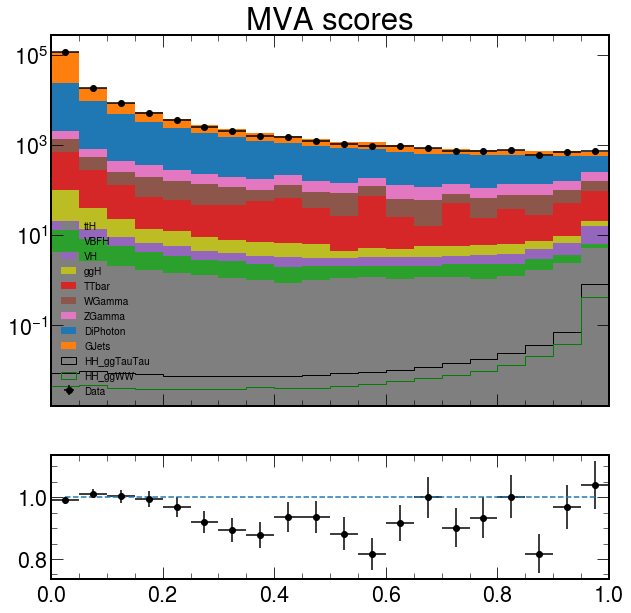

In [72]:
mgg_binning = "20,0,1" # ROOT convention

data_mva_hists = {}
for process, process_id in process_ids.items():
    toFill = data_df.loc[data_df["process_id"] == process_id, "bdt_data_driven"] # select by process, then select the quantity
    weight = data_df.loc[data_df["process_id"] == process_id, "weight"]
    if process in colors:
        data_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        data_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
data_mva_hists["TTbar"] += data_mva_hists["TTGamma"] + data_mva_hists["TTGG"]

hist_stack = [hist for process, hist in data_mva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
data_mva_hists["Data"].plot(ax=ax1, show_errors=True, color="k")


data_mva_hists["HH_ggWW"] = data_mva_hists["HH_ggWW_dileptonic"] + data_mva_hists["HH_ggWW_semileptonic"]
data_mva_hists["HH_ggTauTau"].plot(ax=ax1, color=colors["HH_ggTauTau"], histtype="step")
data_mva_hists["HH_ggWW"].plot(ax=ax1, histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
#plt.title("Di-Photon Mass Non-resonant backgrounds Category 3")
ax1.set_yscale("log")
ax1.legend(fontsize=10)

total_background = hist_stack[0].copy()
for hist in hist_stack[1:]:
        total_background = total_background + hist
ratio_hist = data_mva_hists["Data"].copy()
ratio_hist = (ratio_hist / total_background)
ratio_hist.plot(ax=ax2, show_errors=True, legend=False)
plt.sca(ax2)
plt.plot(ratio_hist.bin_centers, np.ones_like(ratio_hist.bin_centers), "--")
ax1.set_title("MVA scores")
plt.savefig("data_driven_mva_scores.pdf")

In [61]:
t = uproot.open("../BDT/20220112_mc_only_zipped.root")["t"]
mc_df = t.arrays(library="pd")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


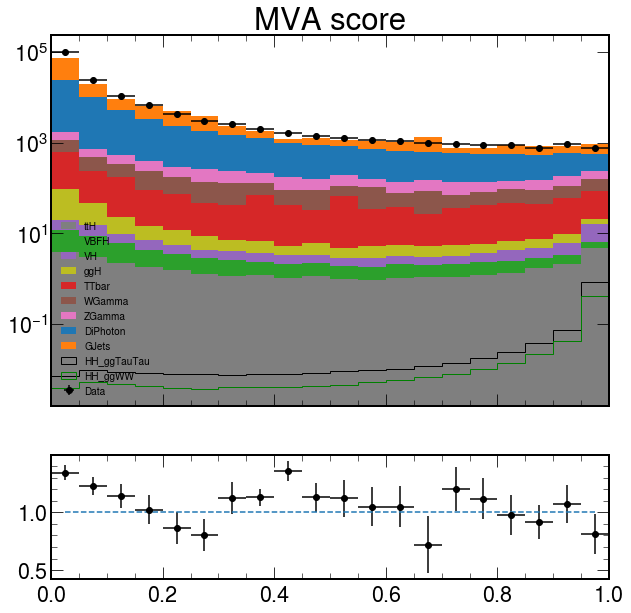

In [73]:
mgg_binning = "20,0,1" # ROOT convention

mc_mva_hists = {}
for process, process_id in process_ids.items():
    toFill = mc_df.loc[mc_df["process_id"] == process_id, "bdt_mc_only"] # select by process, then select the quantity
    weight = mc_df.loc[mc_df["process_id"] == process_id, "weight"]
    if process in colors:
        mc_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mc_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
mc_mva_hists["TTbar"] += mc_mva_hists["TTGamma"] + mc_mva_hists["TTGG"]

hist_stack = [hist for process, hist in mc_mva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mc_mva_hists["Data"].plot(ax=ax1, show_errors=True, color="k")


mc_mva_hists["HH_ggWW"] = mc_mva_hists["HH_ggWW_dileptonic"] + mc_mva_hists["HH_ggWW_semileptonic"]
mc_mva_hists["HH_ggTauTau"].plot(ax=ax1, color=colors["HH_ggTauTau"], histtype="step")
mc_mva_hists["HH_ggWW"].plot(ax=ax1, histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
#plt.title("Di-Photon Mass Non-resonant backgrounds Category 3")
ax1.set_yscale("log")
ax1.legend(fontsize=10)

total_background = hist_stack[0].copy()
for hist in hist_stack[1:]:
        total_background = total_background + hist
ratio_hist = mc_mva_hists["Data"].copy()
ratio_hist = (ratio_hist / total_background)
ratio_hist.plot(ax=ax2, show_errors=True, legend=False)
plt.sca(ax2)
plt.plot(ratio_hist.bin_centers, np.ones_like(ratio_hist.bin_centers), "--")
ax1.set_title("MVA score")
plt.savefig("mc_only_mva_scores.pdf")

Data-data comparison

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


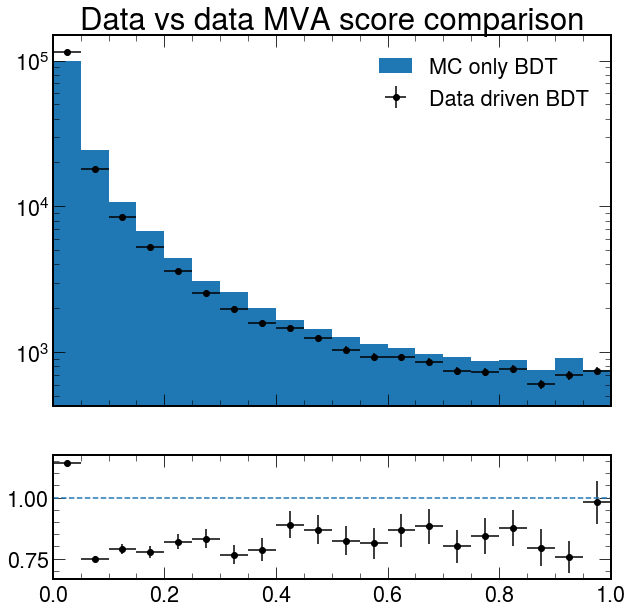

In [74]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
plt.sca(ax1)
data_mva_hists["Data"].plot(show_errors=True, label="Data driven BDT")
mc_mva_hists["Data"].plot(color="C0", histtype="stepfilled", label="MC only BDT")
plt.title("Data vs data MVA score comparison")
plt.yscale("log")
plt.sca(ax2)
ratio_hist = data_mva_hists["Data"].copy()
ratio_hist /= mc_mva_hists["Data"]
ratio_hist.plot(show_errors=True, legend=False)
plt.plot(linspace(0,1,50), np.ones(50), "--")
plt.savefig("mva_score_compare.pdf")

In [76]:
mc_df.loc[mc_df["process_id"] == 0]

,index,MET_dil_dphi,phi_tautau_SVFit,eta_bdt_tautau_SVFit,eta_tautau_SVFit,gg_tt_hel_vis,lep12_dR,pt_tautau_SVFit,lep12_deta,eta_tautau_vis,...,Category_onehot_8,Category_onehot_7,Category_onehot_1,Category_onehot_3,Category_onehot_2,Category_onehot_6,Category_onehot_4,Category_onehot_5,train_label,bdt_mc_only
428171,428171,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.011502
428172,428172,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028520
428173,428173,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125108
428174,428174,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019490
428175,428175,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.028853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483517,483517,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.032790
483518,483518,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.013954
483519,483519,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.469056
483520,483520,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.031716


In [77]:
data_df.loc[data_df["process_id"] == 0]

,index,n_taus,n_electrons,n_muons,n_isoTrk,n_jets,n_bjets,g1_ptmgg,g2_ptmgg,g1_eta_bdt,...,Category_onehot_8,Category_onehot_7,Category_onehot_1,Category_onehot_3,Category_onehot_2,Category_onehot_6,Category_onehot_4,Category_onehot_5,train_label,bdt_data_driven
428171,428171,1.0,0.0,0.0,1.0,1.0,0.0,0.431386,0.273593,1.347900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.002044
428172,428172,1.0,0.0,0.0,0.0,2.0,0.0,0.413557,0.386823,0.171112,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011812
428173,428173,1.0,0.0,0.0,0.0,1.0,0.0,0.856041,0.297514,1.795410,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067008
428174,428174,1.0,0.0,0.0,0.0,0.0,0.0,0.484641,0.457997,0.853027,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025697
428175,428175,1.0,0.0,0.0,0.0,0.0,0.0,0.545763,0.416248,1.405762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.035273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483517,483517,1.0,0.0,0.0,0.0,1.0,0.0,0.542233,0.461983,0.687622,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.020122
483518,483518,1.0,0.0,0.0,0.0,0.0,0.0,0.488282,0.467419,2.474609,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.013801
483519,483519,1.0,0.0,0.0,0.0,3.0,0.0,1.144776,0.300473,0.378113,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.331963
483520,483520,1.0,0.0,0.0,0.0,1.0,0.0,0.537857,0.290619,1.978027,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.025688


In [78]:
# blend the two

composite_data_df = mc_df.loc[mc_df["process_id"] == 0].copy()
composite_data_df["bdt_data_driven"] = data_df["bdt_data_driven"]

(<matplotlib.image.AxesImage at 0x7faf82b64470>,
 <AxesSubplot:xlabel='bdt_mc_only', ylabel='bdt_data_driven'>)

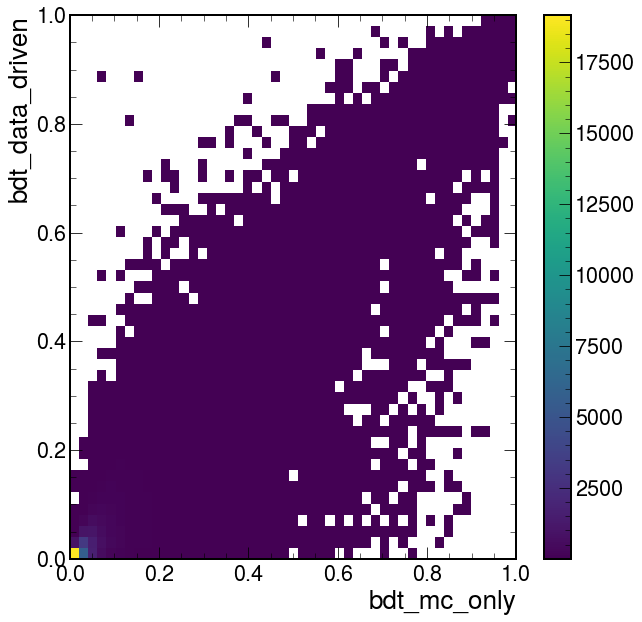

In [83]:
from yahist import Hist2D
Hist2D(composite_data_df[["bdt_mc_only", "bdt_data_driven"]], bins=(linspace(0,1,50), linspace(0,1,50))).plot()